# Multiple Regression Examples

In [1]:
library(AER)
library(stargazer)

Loading required package: car
Loading required package: carData
Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: survival

Please cite as: 

 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



## Example 1: Doctor Visits

### Load the dataset DoctorVisits - Australian health care data

https://rdrr.io/cran/AER/man/DoctorVisits.html

#### Description
Cross-section data originating from the 1977–1978 Australian Health Survey.

#### Usage
data("DoctorVisits")

#### Format
A data frame containing 5,190 observations on 12 variables.

##### visits

Number of doctor visits in past 2 weeks.

##### gender

Factor indicating gender.

##### age

Age in years divided by 100.

##### income

Annual income in tens of thousands of dollars.

##### illness

Number of illnesses in past 2 weeks.

In [61]:
data("DoctorVisits")
# correct the age (years) and income (thousands Aus Dollar) variables
DoctorVisits$age = 100*DoctorVisits$age
DoctorVisits$income = 100*DoctorVisits$income

head(DoctorVisits)

visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
1,female,19,55,1,4,1,yes,no,no,no,no
1,female,19,45,1,2,1,yes,no,no,no,no
1,male,19,90,3,0,0,no,no,no,no,no
1,male,19,15,1,0,0,no,no,no,no,no
1,male,19,45,2,5,1,no,no,no,yes,no
1,female,19,35,5,1,9,no,no,no,yes,no


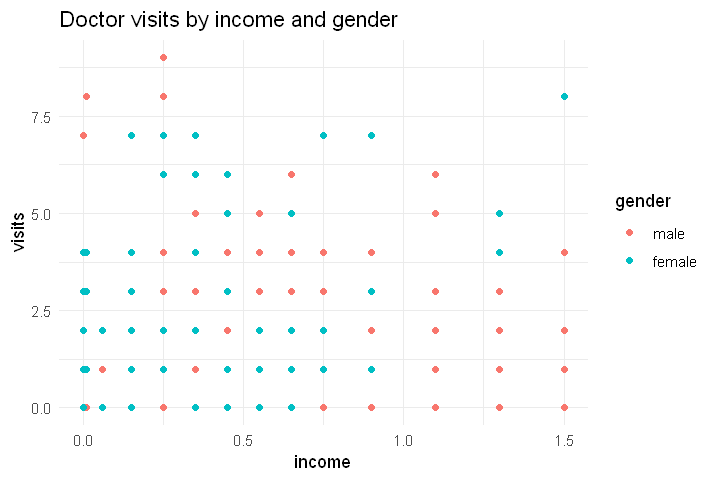

In [60]:
# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=4)
#plot(visits~age, data = DoctorVisits)

library(ggplot2)
ggplot(DoctorVisits, aes(y=visits, x=income, colour = gender)) +
    geom_point()+
    ggtitle("Doctor visits by income and gender")+
    theme_minimal()

In [3]:
cat('Max visits', max(DoctorVisits$visits))

reg1 <- lm(visits~income+age+gender, data = DoctorVisits)
rob_se <- sqrt(diag(vcovHC(reg1, type = "HC1")))

stargazer(reg1, type = "text", se = list(rob_se))

Max visits 9
                        Dependent variable:    
                    ---------------------------
                              visits           
-----------------------------------------------
income                       -0.001**          
                             (0.0003)          
                                               
age                          0.004***          
                              (0.001)          
                                               
genderfemale                  0.062**          
                              (0.025)          
                                               
Constant                     0.154***          
                              (0.034)          
                                               
-----------------------------------------------
Observations                   5,190           
R2                             0.019           
Adjusted R2                    0.018           
Residual Std. Error      0.

### How do we interpret the coefficient on age?

#### Sign
#### Magnitude
#### Units
#### Ceteris paribus

If people one year older are expected (on average) to visit the doctor 0.004 times more per year, ceteris paribus (compared to people of the same gender and income).


### How do we interpret the coefficient on gender?

Females are on average expected to make 0.062 more visits than males per year, ceteris paribus (of the same age and income).

### Who are these results valid for?  Can we talk about non-marginal changes?

## Example 2: US Seat Belts

### Usage
data("USSeatBelts")

### Format
A data frame containing 765 observations on 12 variables.

#### state
factor indicating US state (abbreviation).

#### year
factor indicating year.

#### miles
millions of traffic miles per year.

#### fatalities
number of fatalities per million of traffic miles (absolute frequencies of fatalities = fatalities times miles).

#### seatbelt
seat belt usage rate, as self-reported by state population surveyed.

#### speed65
factor. Is there a 65 mile per hour speed limit?

#### speed70
factor. Is there a 70 (or higher) mile per hour speed limit?

#### drinkage
factor. Is there a minimum drinking age of 21 years?

#### alcohol
factor. Is there a maximum of 0.08 blood alcohol content?

#### income
median per capita income (in current US dollar).

#### age
mean age.

#### enforce
factor indicating seat belt law enforcement ("no", "primary", "secondary").

In [34]:
data("USSeatBelts")

# Take a subset of the data for 1988
mydata <- subset(USSeatBelts, USSeatBelts$year==1988)
mydata$income <- mydata$income/1000
head(mydata)

,state,year,miles,fatalities,seatbelt,speed65,speed70,drinkage,alcohol,income,age,enforce
6,AK,1988,3841,0.02525384,NA,no,no,yes,no,18.447,28.85142,no
21,AL,1988,39684,0.02580385,0.2900,yes,no,yes,no,13.288,35.13696,no
36,AR,1988,19219,0.03173942,0.3010,yes,no,yes,no,12.637,36.14387,no
51,AZ,1988,34247,0.02756446,NA,yes,no,yes,no,15.246,34.65613,no
66,CA,1988,241575,0.02232019,0.5085,yes,no,yes,no,19.263,33.80381,secondary
81,CO,1988,27665,0.01796494,NA,yes,no,yes,no,16.985,33.52192,secondary


In [45]:
#How can we calculate the sample size?
length(mydata$state)
summary(mydata)

[1] 51

     state         year        miles          fatalities         seatbelt     
 AK     : 1   1988   :51   Min.   :  3405   Min.   :0.01673   Min.   :0.2780  
 AL     : 1   1983   : 0   1st Qu.: 10454   1st Qu.:0.01982   1st Qu.:0.3400  
 AR     : 1   1984   : 0   Median : 31614   Median :0.02283   Median :0.4700  
 AZ     : 1   1985   : 0   Mean   : 39718   Mean   :0.02376   Mean   :0.4492  
 CA     : 1   1986   : 0   3rd Qu.: 48349   3rd Qu.:0.02677   3rd Qu.:0.5500  
 CO     : 1   1987   : 0   Max.   :241575   Max.   :0.03313   Max.   :0.6650  
 (Other):45   (Other): 0                                      NA's   :22      
 speed65  speed70  drinkage alcohol      income           age       
 no : 8   no :51   no : 0   no :48   Min.   :11.24   Min.   :28.85  
 yes:43   yes: 0   yes:51   yes: 3   1st Qu.:13.65   1st Qu.:34.30  
                                     Median :15.81   Median :35.06  
                                     Mean   :16.14   Mean   :34.87  
                       

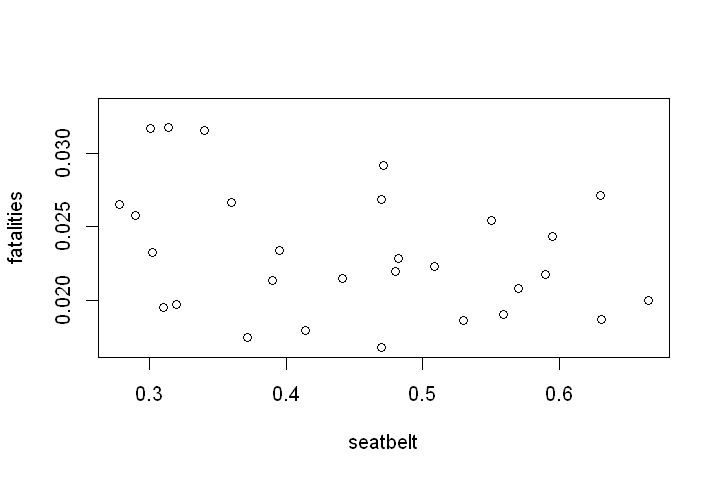

In [46]:
# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=4)
plot(fatalities~seatbelt, data = mydata)

In [41]:
reg2 <- lm(fatalities~age+seatbelt+income+enforce, data = mydata)
rob_se2 <- sqrt(diag(vcovHC(reg2, type = "HC1")))
stargazer(reg2, type = "text", se = list(rob_se2))


                        Dependent variable:    
                    ---------------------------
                            fatalities         
-----------------------------------------------
age                            0.001           
                              (0.001)          
                                               
seatbelt                     -0.019**          
                              (0.009)          
                                               
income                       -0.001***         
                             (0.0003)          
                                               
enforceprimary                0.006**          
                              (0.003)          
                                               
enforcesecondary               0.003           
                              (0.002)          
                                               
Constant                       0.021           
                              (0.026)  